<a href="https://colab.research.google.com/github/robomoan/Data_Science_Study/blob/main/hg_ml_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch3. 회귀 알고리즘과 모델 규제
농어의 무게 예측하기

## K-최근접 이웃 회귀

###데이터 준비

농어의 길이와 무게 데이터 [링크](https://gist.github.com/rickiepark/2cd82455e985001542047d7d55d50630)

In [1]:
import numpy as np

In [2]:
# 데이터 부르기
# 농어 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
# 농어 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

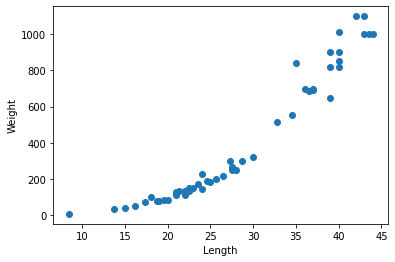

In [3]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [4]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [5]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [6]:
# 넘파이의 reshape로 input 데이터를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


###결정계수($R^2$)

결정계수는 회귀식의 적합도를 나타내는 척도
<br>$R^2 = 1- \frac{\sum (타깃 - 예측) ^2}{\sum (타깃 - 평균)^2}$
<br>결정계수는 0과 1 사이의 값을 가지며 1에 가까울 수록 예측이 타깃에 가까워진다.

In [7]:
# K-최근접 이웃 회귀 알고리즘 이용
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# 모델 훈련하기
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [8]:
# score 메서드의 출력값이 결정계수
print(knr.score(test_input, test_target))

0.9928094061010639


결정계수가 아닌 또 다른 측정값으로는
- 평균 절댓값 오차 Mean absolute error (MAE)
- 평균 제곱근 오차 Root mean square error (RMSE)
가 있다.

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 평균 절댓값 오차
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 평균 제곱근 오차
rmse = mean_squared_error(test_target, test_prediction, squared = False)
print(rmse)

19.157142857142862
26.865192562655704


#### K-최근접 이웃 가중치 회귀

In [10]:
# 거리에 따른 가중치 부여
knwr = KNeighborsRegressor(weights='distance') # 디폴트 값은 'uniform'

# 모델 훈련하기
knwr.fit(train_input, train_target)

# 테스트 세트의 결정계수
print(knwr.score(test_input, test_target))

# 훈련 세트의 결정계수
print(knwr.score(train_input, train_target))

0.9683683793800699
0.9927796343304285


### 과대적합 vs 과소적합

- 훈련 세트에서는 점수가 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 **과대적합**
- 훈련 세트보다 테스트 세트의 점수가 더 높게 나오거나 두 점수가 모두 낮은 경우 **과소적합**

In [11]:
# 테스트 세트의 결정계수
print(knr.score(test_input, test_target))

# 훈련 세트의 결정계수
print(knr.score(train_input, train_target))

0.9928094061010639
0.9698823289099255


모델이 훈련세트에 **과소적합**되었다.
<br>과소적합이 되는 이유는 주로 테스트 세트와 훈련 세트의 크기가 작아서이다.
<br>이를 해결하기 위해 모델을 더 복잡하게 만든다. 모델을 복잡하게 하기 위해 참고하는 이웃의 수를 줄인다.



In [12]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


##선형회귀

###K-최근접 이웃 회귀 모델의 한계

In [13]:
# 데이터 불러오기
# 농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [14]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

# 최근접 이웃을 3개로 하는 회귀 모형 만들기
knr = KNeighborsRegressor(n_neighbors=3)

# 모델 훈련하기
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
# 길이가 50cm인 농어의 무게 예측하기
print(knr.predict([[50]]))

[1033.33333333]


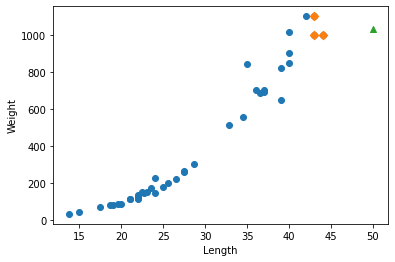

In [17]:
# 산점도 그리기
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 이웃 샘플을 다른 마커로 표시하기
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

50cm 농어의 데이터가 다른 데이터와의 경향성과는 많이 동떨어져있다.

In [18]:
# 이웃 샘플의 타깃의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


K-최근접 이웃 회귀는 가까운 이웃을 찾아 타깃을 평균낸다.
<br>따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값이 예측된다.

In [19]:
# 100cm 농어의 무게 예측
print(knr.predict([[100]]))

[1033.33333333]


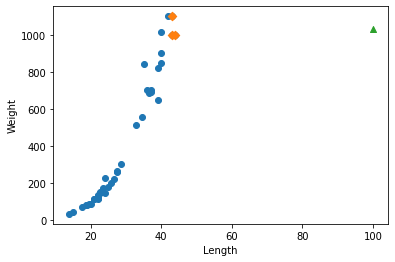

In [20]:
# 산점도 그리기
import matplotlib.pyplot as plt

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 이웃 샘플을 다른 마커로 표시하기
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

### 선형회귀

데이터의 특성을 잘 나타내는 선형회귀곡선을 예측하는 알고리즘

In [21]:
# 선형 회귀 알고리즘을 위한 클래스
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어 무게 예측하기
lr.predict([[50]])

array([1241.83860323])

선형회귀모형: $y = \beta_{0} + \beta_{1}x$
<br>$\beta_{0}$와 $\beta_{1}$ 구하기

In [22]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


$\beta_{0} = -709.02$, $\beta_{1} = 39.02$

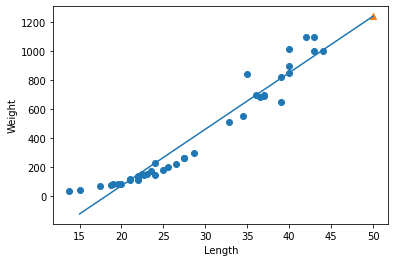

In [23]:
# 산점도 그리기
plt.scatter(train_input, train_target)

# x 범위 15에서 50까지 회귀직선 그리기
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [24]:
# 모델에 대한 결정계수 구하기
# 훈련 세트
print(lr.score(train_input, train_target))

# 테스트 세트
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


결정계수가 양 세트에서 모두 낮게 나왔다. 모델이 단순하여 작은 길이의 농어는 무게가 음수로 예측 될 수도 있다.

### 다항회귀

직선이 아닌 곡선 형태의 회귀모형을 찾아보자
<br>모형: $y = \beta_{0} + \beta_{1}x + \beta_{2}x^2$

In [25]:
# 훈련 세트와 테스트 세트의 제곱항 새로 만들기
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [26]:
# 모델 훈련하기
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 50cm 농어 무게 예측하기
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [27]:
# 계수 구하기
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


$\beta_{0} = 116.05$, $\beta_{1} = -21.56$, $\beta_{2}=1.01$

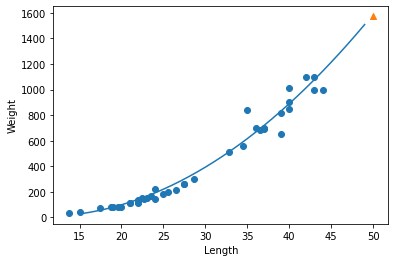

In [28]:
# 구간별 직선을 그리기 위해 정수 배열 만들기
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 116.05 - 21.06*point + 1.01*point**2)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker = '^')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [29]:
# 모델에 대한 결정계수 구하기

# 훈련 세트
print(lr.score(train_poly, train_target))

# 테스트 세트
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


## 특성 공학과 규제

## 다중 회귀

여러개의 특성을 사용한 선형회귀다.
<br>농어의 길이 뿐만 아니라 높이와 두께 데이터도 함께 활용한다.
<br>'길이 x 높이' 같이 기존의 특성을 이용하여 새로운 특성을 만드는 것을 **특성 공학**이라고 한다.

농어의 길이, 높이 두께 데이터 [링크](https://raw.githubusercontent.com/rickiepark/hongong-ml/master/perch_full.csv)

In [30]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rickiepark/hongong-ml/master/perch_full.csv")

# 판다스 데이터프레임형을 넘파이 배열형으로 바꾸기
perch_full = df.to_numpy()

print(perch_full)


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [31]:
# 타깃 데이터 불러오기
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [32]:
# 훈련 세트와 데이터 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기

변환기 클래스에는 모두 fit(), transform() 매서드를 제공한다.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# 예로 2, 3으로 이뤄진 샘플을 적용함
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


1은 절편을 나타내는 값이므로 1을 생략할 수 있다.

In [35]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


굳이 생략하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시함

In [36]:
# 변환기를 train_input에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)


(42, 9)


In [37]:
# 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 출력
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [38]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

fit() 매서드로는 특성 조합을 준비하기만 하고 값을 구하지는 않는다.<br>훈련 세트와 테스트 세트의 조합을 동일하게 맞추기 위해 훈련 세트에 적용한 변환기로 테스트 세트를 변환하는 것이 좋다.

### 다중 회귀 모델 훈련하기

In [39]:
# 모델 훈련 후 훈련 세트에 대한 결정계수 구하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [40]:
# 테스트 세트에 대한 결정계수 구하기
print(lr.score(test_poly, test_target))

0.9714559911594132


만약 특성을 더 많이 추가한다면...

In [41]:
# 5제곱까지 특성을 만들어 출력하기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [42]:
# 모델을 훈련하고 결정계수 구하기
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 훈련 세트
print(lr.score(test_poly, test_target)) # 테스트 세트

0.9999999999991096
-144.40579242335605


훈련모델에 과대적합되었다.

### 규제

규제는 머신러닝 모델이 훈련 세트를 과도하게 학습하여 과대적합되지 못하도록 패널티를 주는 역할을 한다.

길이, 무게, 두께에 대한 스케일을 정규화하기
<br>사이킷런의 StandardScaler를 이용

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### 릿지 회귀

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) # 훈련 세트
print(ridge.score(test_scaled, test_target)) # 테스트 세트

0.9896101671037343
0.9790693977615398


alpha 값으로 규제의 강도를 조절함
<br>alpha 값에 따른 결정계수의 변화 알아보기

In [45]:
# score() 메서드의 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [46]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

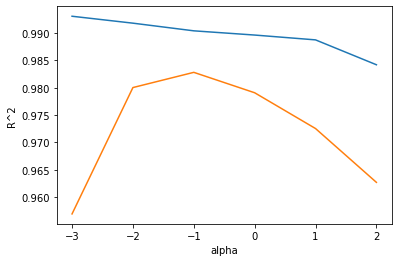

In [47]:
# log(alpha)값에 따른 결정계수 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha가 0.1일때 가장 효과적임을 알 수 있음

In [48]:
# alpha = 0.1일때 점수 구하기
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) # 훈련 세트
print(ridge.score(test_scaled, test_target)) # 테스트 세트

0.9903815817570366
0.9827976465386927


#### 라쏘 회귀

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target)) # 훈련 세트
print(lasso.score(test_scaled, test_target)) # 테스트 세트

0.9897898972080961
0.9800593698421883


In [50]:
# alpha에 따른 결정계수 구하기
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter=10000) # 반복수를 10000개로 설정
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


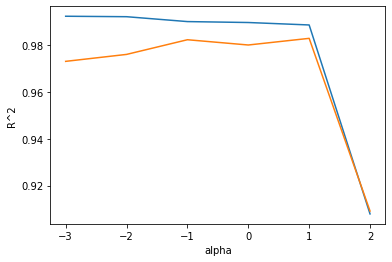

In [51]:
# log(alpha) 값에 따른 결정계수 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

alpha가 10일때 가장 효과적임을 알 수 있음

In [52]:
# alpha = 10일때 점수 구하기
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target)) # 훈련 세트
print(lasso.score(test_scaled, test_target)) # 테스트 세트

0.9888067471131867
0.9824470598706695


라쏘 회귀는 알고리즘 특성상 계수 값을 0으로 만들 수 있다.

In [53]:
# 계수값가 0인 계수의 개수 구하기
print(np.sum(lasso.coef_ == 0))

40


55개의 특성 중 라쏘 회귀로 사용된 특성을 15개임을 알 수 있다.